In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [30]:
df=pd.read_csv(r"/content/adult.csv")
df.head(30)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [33]:
print("Initial shape of the dataset : ", df.shape)

# Dropping the duplicate Rows
df = df.drop_duplicates(keep = 'first')
print ("Shape of the dataset after dropping the duplicate rows : ", df.shape)


Initial shape of the dataset :  (32561, 15)
Shape of the dataset after dropping the duplicate rows :  (32537, 15)


In [34]:
# Let's Count the occuring of the '?' in all the columns
for i in df.columns:
    t = df[i].value_counts()
    index = list(t.index)
    print ("The Value Counts of ? in", i)
    for i in index:
        temp = 0
        if i == ' ?':
            print (t[' ?'])
            temp = 1
            break
    if temp == 0:
        print ("0")

The Value Counts of ? in age
0
The Value Counts of ? in workclass
1836
The Value Counts of ? in fnlwgt
0
The Value Counts of ? in education
0
The Value Counts of ? in education-num
0
The Value Counts of ? in marital-status
0
The Value Counts of ? in occupation
1843
The Value Counts of ? in relationship
0
The Value Counts of ? in race
0
The Value Counts of ? in sex
0
The Value Counts of ? in capital-gain
0
The Value Counts of ? in capital-loss
0
The Value Counts of ? in hours-per-week
0
The Value Counts of ? in country
582
The Value Counts of ? in salary
0


In [35]:
for col in ['workclass', 'occupation', 'country']:
    df[col].fillna(df[col].mode()[0], inplace=True)
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [36]:
# Checking the Difference between the values of the mean and median to get an idea about the amount of outliers
print (df['hours-per-week'].median())
print (df['hours-per-week'].mean())

40.0
40.44032947106371


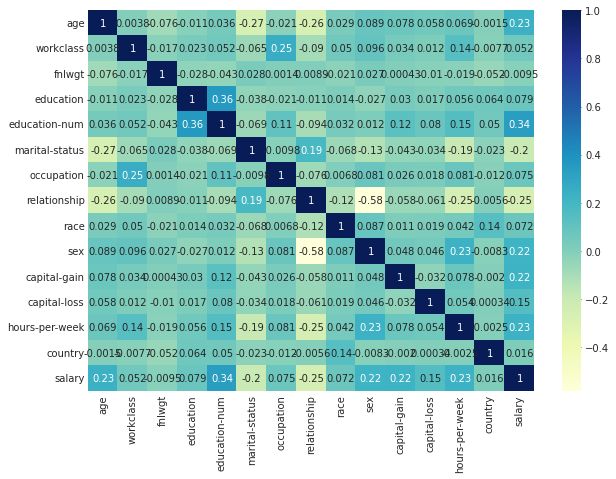

In [62]:
#This heatmap shows the Correlation between the different variables
plt.rcParams['figure.figsize'] = [10,7]
sns.heatmap(df.corr(), annot = True, color = 'blue', cmap = 'YlGnBu');

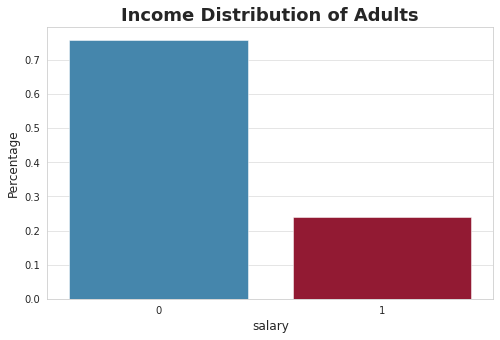

In [66]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
eda_percentage = df['salary'].value_counts(normalize = True).rename_axis('salary').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'salary', y = 'Percentage', data = eda_percentage.head(10))

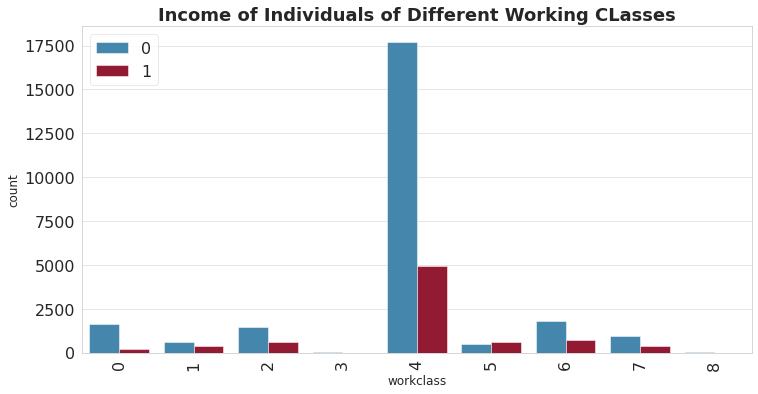

In [67]:
plt.figure(figsize=(12,6))
sns.countplot(df['workclass'], hue = df['salary'])
plt.title('Income of Individuals of Different Working CLasses', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

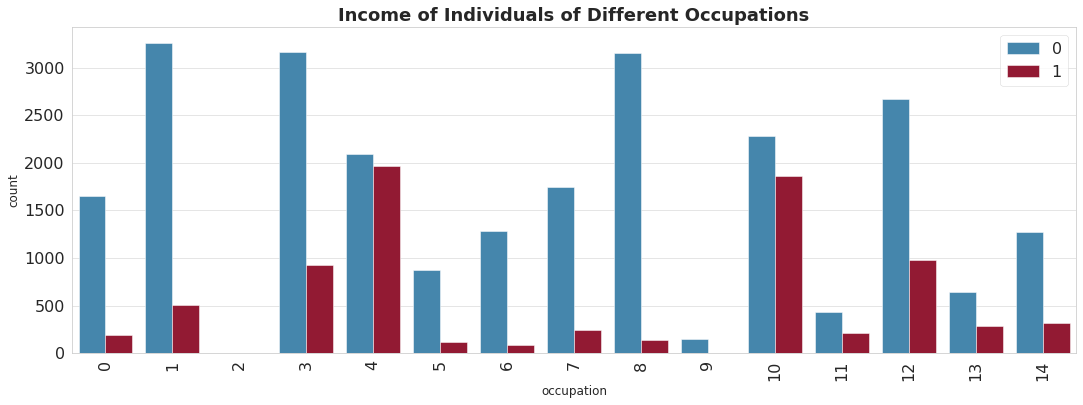

In [68]:
plt.figure(figsize=(18,6))
sns.countplot(df['occupation'], hue = df['salary'])
plt.title('Income of Individuals of Different Occupations', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

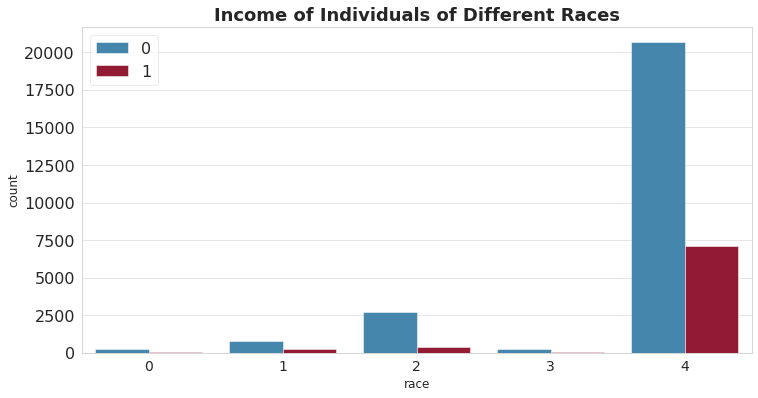

In [69]:
plt.figure(figsize=(12,6))
sns.countplot(df['race'], hue = df['salary'])
plt.title('Income of Individuals of Different Races', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [43]:
# Changing the income column into Numerical Value
df['salary'] = df['salary'].map({' <=50K':0, ' >50K':1})

In [44]:
df['salary'].value_counts()

0    24698
1     7839
Name: salary, dtype: int64

In [45]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [46]:
from sklearn.preprocessing import LabelEncoder

categorical_features = list(df.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [47]:
# Shuffling the Data Set
from sklearn.utils import shuffle
df = shuffle(df)

# Splitting the data set into train and test set
from sklearn.model_selection import train_test_split

features_ = df.drop(columns = ['salary','education-num'])
target = df['salary']
X_train, X_test, y_train, y_test = train_test_split(features_, target, test_size = 0.3,random_state = 0)

print ("Train data set size : ", X_train.shape)
print ("Test data set size : ", X_test.shape)

Train data set size :  (22775, 13)
Test data set size :  (9762, 13)


In [48]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import warnings; warnings.simplefilter('ignore')

In [49]:
# Training the model_1
logistic = LogisticRegression(C = 0.5, max_iter = 500)
model_1 = logistic.fit(X_train, y_train)

# Predictions
pred_1 = model_1.predict(X_test)

print ("The accuracy of model 1 : ",accuracy_score(y_test, pred_1))
print ("The f1 score of model 1 : ", f1_score(y_test, pred_1, average = 'binary'))

The accuracy of model 1 :  0.7846752714607662
The f1 score of model 1 :  0.3935372186959031


In [50]:
# Training the model_2
R_forest = RandomForestClassifier(n_estimators = 200)
model_2 = R_forest.fit(X_train, y_train)

# Predictions
pred_2 = model_2.predict(X_test)

print ("The accuracy of model 2 : ",accuracy_score(y_test, pred_2))
print ("The f1 score of model 2 : ", f1_score(y_test, pred_2, average = 'binary'))

The accuracy of model 2 :  0.8591477156320426
The f1 score of model 2 :  0.6750177263058378


In [70]:
# Training the model 3
import xgboost as xgb
# xgb.set_config(verbosity=0)
from xgboost import XGBClassifier
boosted_gd = XGBClassifier(learning_rate = 0.35, n_estimator = 500)
model_3 = boosted_gd.fit(X_train, y_train)

# Predictions
pred_3 = model_3.predict(X_test)

print ("The accuracy of model 3 : ",accuracy_score(y_test, pred_3))
print ("The f1 score of model 3 : ", f1_score(y_test, pred_3, average = 'binary'))

The accuracy of model 3 :  0.8719524687564024
The f1 score of model 3 :  0.7013855709507884


In [53]:
# Training the model 4
NB = BernoulliNB(alpha = 0.3)
model_4 = NB.fit(X_train, y_train)

# Predictions
pred_4 = model_4.predict(X_test)

print ("The accuracy of model 4 : ",accuracy_score(y_test, pred_4))
print ("The f1 score of model 4 : ", f1_score(y_test, pred_4, average = 'binary'))

The accuracy of model 4 :  0.7271051014136447
The f1 score of model 4 :  0.553170077155317


In [55]:
list_pred = [pred_1, pred_2, pred_3, pred_4]
model_names = ["Logistic Regression", "Random Forest Classifier", "Boosted Gradient Descent", "Bernoulli NB", "SVC"]

for i, predictions in enumerate(list_pred) :
    print ("Classification Report of ", model_names[i])
    print ()
    print (classification_report(y_test, predictions, target_names = ["<=50K", ">50K"]))

Classification Report of  Logistic Regression

              precision    recall  f1-score   support

       <=50K       0.81      0.94      0.87      7423
        >50K       0.61      0.29      0.39      2339

    accuracy                           0.78      9762
   macro avg       0.71      0.62      0.63      9762
weighted avg       0.76      0.78      0.76      9762

Classification Report of  Random Forest Classifier

              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      7423
        >50K       0.75      0.61      0.68      2339

    accuracy                           0.86      9762
   macro avg       0.82      0.77      0.79      9762
weighted avg       0.85      0.86      0.85      9762

Classification Report of  Boosted Gradient Descent

              precision    recall  f1-score   support

       <=50K       0.89      0.95      0.92      7423
        >50K       0.79      0.63      0.70      2339

    accuracy                   

In [56]:
for i, pred in enumerate(list_pred) :
    print ("The Confusion Matrix of : ", model_names[i])
    print (pd.DataFrame(confusion_matrix(y_test, pred)))
    print ()

The Confusion Matrix of :  Logistic Regression
      0    1
0  6978  445
1  1657  682

The Confusion Matrix of :  Random Forest Classifier
      0     1
0  6959   464
1   911  1428

The Confusion Matrix of :  Boosted Gradient Descent
      0     1
0  7033   390
1   867  1472

The Confusion Matrix of :  Bernoulli NB
      0     1
0  5449  1974
1   690  1649



In [57]:
xgBoost = XGBClassifier(n_estimator = 100)
xgBoost.fit(X_train, y_train)
prediction = xgBoost.predict(X_test)

In [58]:
print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,prediction))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,prediction))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(y_test,prediction))

----------------------------------------
Accuracy score:
0.8664208154066789
----------------------------------------
Confusion Matrix:
[[7070  353]
 [ 951 1388]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      7423
           1       0.80      0.59      0.68      2339

    accuracy                           0.87      9762
   macro avg       0.84      0.77      0.80      9762
weighted avg       0.86      0.87      0.86      9762

